In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)

In [59]:
# loading data
df = pd.read_csv('data/updated/sales_train.csv')
df_items = pd.read_csv('data/items.csv')
df_categories = pd.read_csv('data/item_categories.csv')

# pd.to_datetime(df['date'], format='%Y.%m.%d');

In [60]:
# data setup
df_no_refunds = df[df['refund'] == 'no']
df_no_refunds_joined = pd.merge(pd.merge(df_no_refunds, df_items, on='item_id'), df_categories, on='item_category_id')

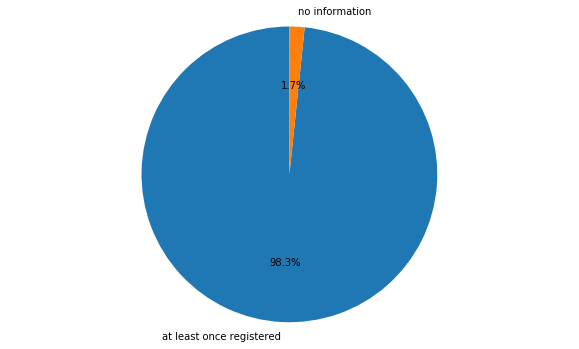

In [61]:
def sold_not_sold_ratio():
    items_sold = df_no_refunds['item_id'].unique().size
    items_total = df_items['item_id'].unique().size

    fig1, ax1 = plt.subplots()
    ax1.pie([items_sold, items_total - items_sold], labels=['at least once registered', 'no information'], autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')
    plt.show()
    
sold_not_sold_ratio()

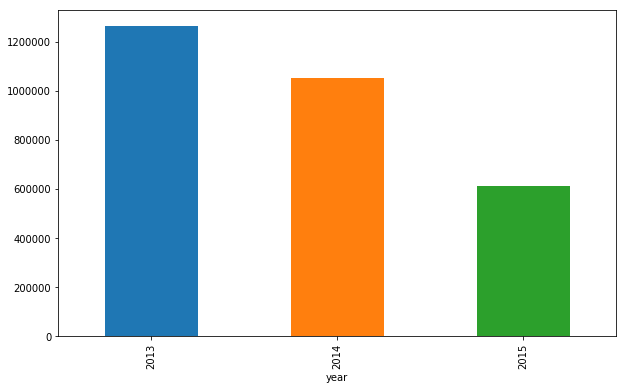

In [62]:
df_no_refunds.groupby('year').size().plot.bar()

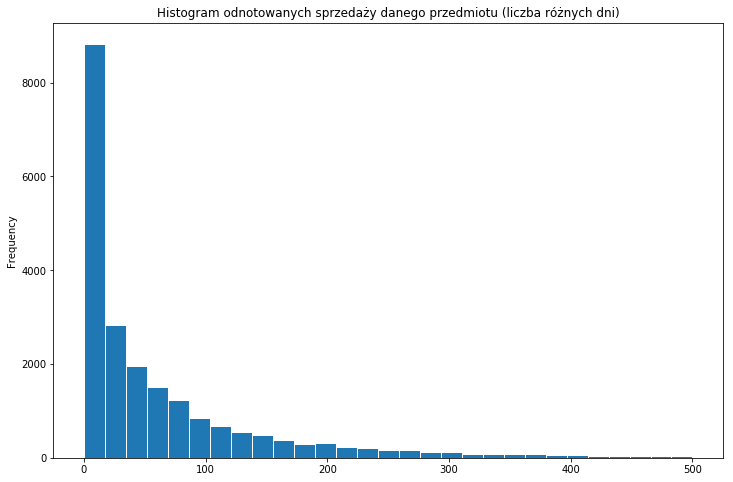

In [63]:
# 1. Reprezentacja różnych przedmiotów w sprzedaży
plt.rcParams["figure.figsize"] = (12,8)

(df_no_refunds
     .groupby('item_id')['date']
     .nunique()
     .to_frame()
     .plot
     .hist(title='Histogram odnotowanych sprzedaży danego przedmiotu (liczba różnych dni)',
           legend=False,
           bins=np.linspace(0, 500, 30),
           ec='white'))

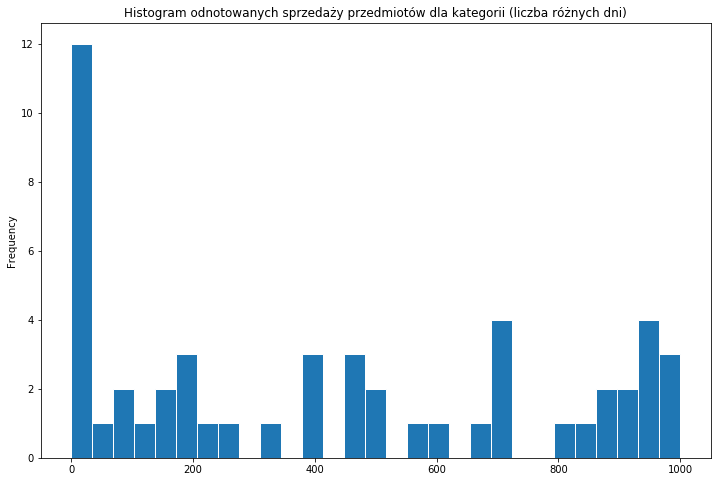

In [64]:
(df_no_refunds_joined
     .groupby('item_category_id')['date']
     .nunique()
     .to_frame()
     .plot
     .hist(title='Histogram odnotowanych sprzedaży przedmiotów dla kategorii (liczba różnych dni)',
            legend=False,
            bins=np.linspace(0, 1000, 30),
            ec='white')) 

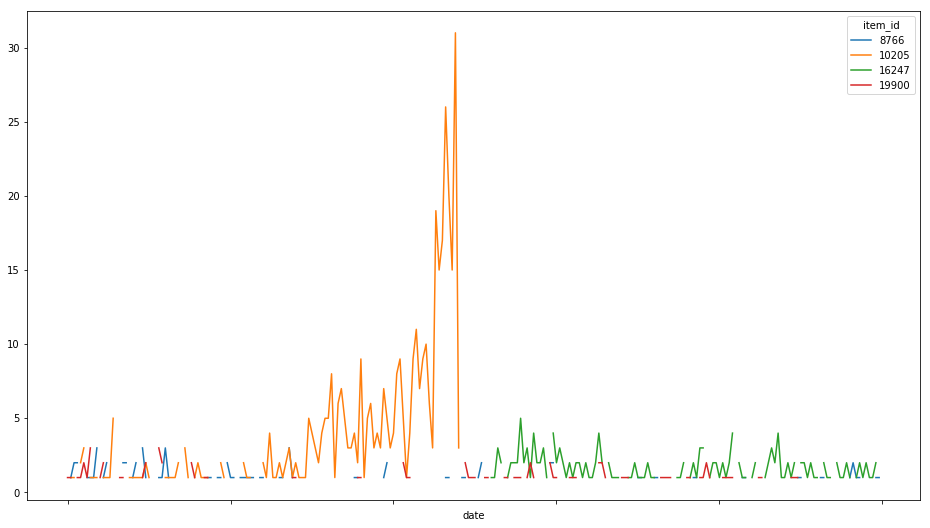

In [74]:
def selected_items_sales_in_period(year=2015):

    plt.rcParams["figure.figsize"] = (16,9)

    df_no_refunds_2015 = df_no_refunds[df_no_refunds['year'] == 2015]
    pd.to_datetime(df.index)

    items_2015_sold_popularity_rising = list(df_no_refunds_2015.groupby('item_id')['date'].nunique().to_frame().sort_values(by='date').index)

    selected_range = slice(10240, 10244)
    showcased_items = items_2015_sold_popularity_rising[selected_range]

#     print(df_no_refunds_2015.info())
    (df_no_refunds_2015[df_no_refunds_2015['item_id'].isin(showcased_items)]
        .groupby(['item_id', 'date'])
        .sum()['item_cnt_day']
        .to_frame()
        .reset_index()
        .pivot('date', 'item_id', 'item_cnt_day')
        .plot(use_index=True))
    
selected_items_sales_in_period()
